# Análisis las charlas de 2024 y 2025

Es necesario tener en un archivo excel las respuestas de las 9 charlas, una por hoja. Cada hoja debe tener las columnas de identificador (N), las preguntas Likert, la calificación general, etc.

In [8]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
# Cargar todas las hojas del archivo
resp_25 = '/Users/camiladelrio/Documents/Proyectos cpc/FIL Mineria/2025/Análisis/Respuestas_25.xlsx'
todas_las_hojas_25 = pd.read_excel(resp_25, sheet_name=None)  # Devuelve un diccionario con {nombre_hoja: DataFrame}

resp_24 = '/Users/camiladelrio/Documents/Proyectos cpc/FIL Mineria/2025/Análisis/Respuestas_24.xlsx'
todas_las_hojas_24 = pd.read_excel(resp_24, sheet_name=None)  # Devuelve un diccionario con {nombre_hoja: DataFrame}

In [13]:
# Nombre de las columnas

preguntas_likert = ['Gozo', 'Confusion', 'Expectativas', 'Lenguaje', 'Analogias', 'Imagenes', 'Fluidez', 'Atencion', 'Gestos', 'Importancia', 'Interes']
columna_calificacion = 'Calif_general'

## Análisis de correlación entre las preguntas de escala Likert (de atributos) y la calificación general de la charla

Es necesario tener en un archivo excel las respuestas de las 9 charlas, una por hoja. Cada hoja debe tener las columnas de identificador (N), las preguntas Likert y la calificación general.

In [26]:
# Calcular corelación de spearman iterando por cada hoja (charla)

def spearman_likert_calif (todas_las_hojas, preguntas_likert, columna_calificacion):
    
    resultados_totales = []
    
    for nombre_charla, df in todas_las_hojas.items():
        for pregunta in preguntas_likert:
            if pregunta in df.columns and columna_calificacion in df.columns:
               
                # Eliminar pares con NaN
                datos = df[[pregunta, columna_calificacion]].dropna()
                
                if not datos.empty:
                    rho, pval = spearmanr(datos[pregunta], datos[columna_calificacion])
                    resultados_totales.append({
                        'charla': nombre_charla,
                        'pregunta': pregunta,
                        'rho': rho,
                        'p_valor': pval
                    })
                else:
                    resultados_totales.append({
                        'charla': nombre_charla,
                        'pregunta': pregunta,
                        'rho': None,
                        'p_valor': None
                    })
    df_resultados = pd.DataFrame(resultados_totales)

    return df_resultados

In [28]:
likert_calif_24 = spearman_likert_calif(todas_las_hojas_24, preguntas_likert, columna_calificacion)
likert_calif_25 = spearman_likert_calif(todas_las_hojas_25, preguntas_likert, columna_calificacion)

,charla,pregunta,rho,p_valor
0,Charla1,Gozo,0.681350,0.000003
1,Charla1,Confusion,0.056387,0.729654
2,Charla1,Expectativas,0.471087,0.003252
3,Charla1,Lenguaje,0.164922,0.315706
4,Charla1,Analogias,0.419700,0.008712
...,...,...,...,...
94,Charla9,Fluidez,-0.286164,0.062840
95,Charla9,Atencion,0.464956,0.001473
96,Charla9,Gestos,0.233618,0.122463
97,Charla9,Importancia,0.359932,0.014012


### Heatmap

Sólo grafico los valores significativos de correlación (p>0.05), los demás van en gris.

In [34]:
#Heatmap de correlaciones

def heatmap_lik_calif (df_resultados, year, ):
        
    '''
    Función que grafica un heatmap de las correlaciones de spearman significativas (p<0.05) ente las preguntas tipo Likert y la calificación general.
    
    Variables:
        df_resultados: dataframe con los resultados (resultado de la función 'spearman_likert_calif')
        year: el año de las conferencias (para incluir en el título)
    '''

    # Matriz con valores de rho
    matriz_rho = df_resultados.pivot(index='charla', columns='pregunta', values='rho')

    # Matriz con p-valores
    matriz_p = df_resultados.pivot(index='charla', columns='pregunta', values='p_valor') 

    # Reordenar las columnas (pivot las pone en orden alfabético)
    orden_columnas = ['Gozo', 'Confusion', 'Expectativas', 'Lenguaje', 'Analogias', 'Imagenes', 'Fluidez', 'Atencion', 'Gestos', 'Importancia', 'Interes']

    matriz_rho = matriz_rho[orden_columnas]
    matriz_p = matriz_p[orden_columnas]
    
    # Crear una máscara booleana donde True = no significativo
    mascara = matriz_p >= 0.05

    paleta = sns.diverging_palette(20, 220, as_cmap=True)

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        matriz_rho,
        mask=mascara,
        cmap=paleta,
        center=0,
        linewidths=0.5,
        cbar_kws={'label': 'Correlación de Spearman (ρ)'}
    )
    plt.title(f'Correlación entre los atributos específicos y la calificación general ({year})')
    plt.xlabel('Atributos')
    plt.ylabel('Charla')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

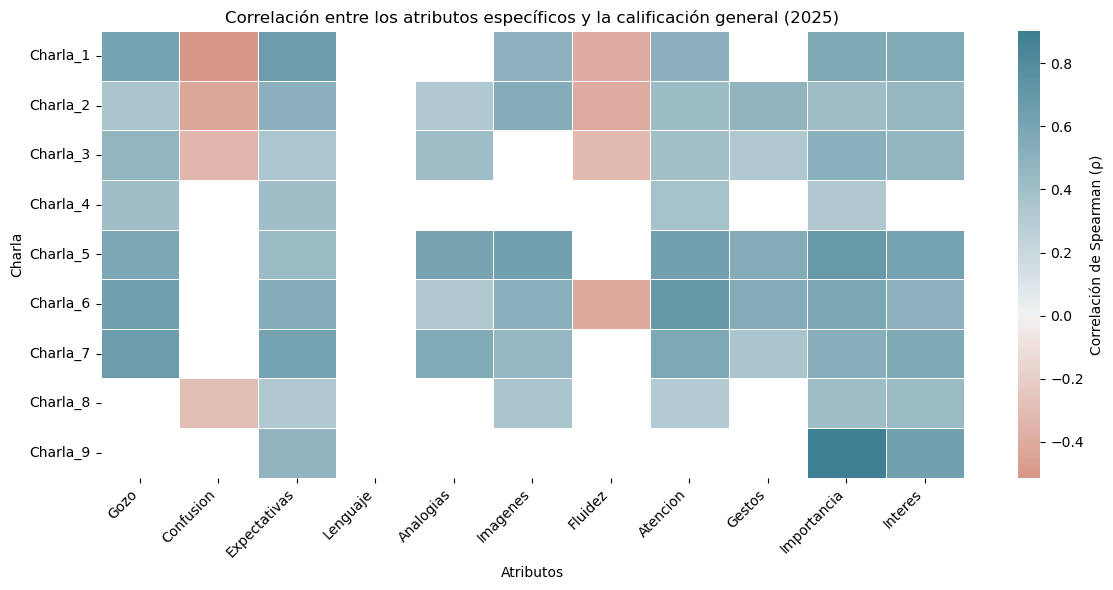

In [36]:
heatmap_lik_calif(likert_calif_25, "2025")

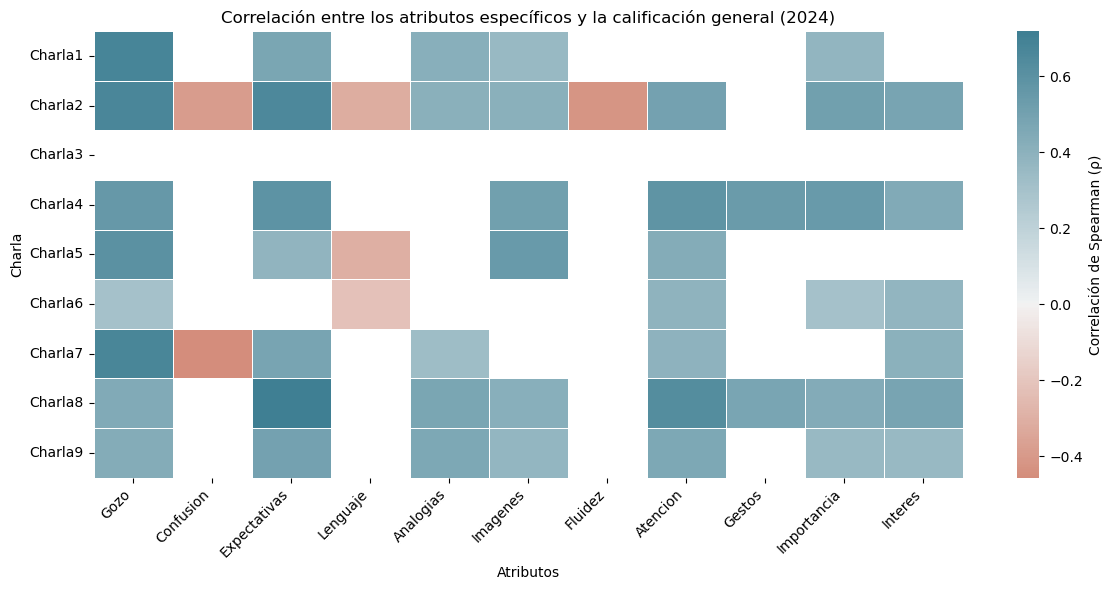

In [37]:
heatmap_lik_calif(likert_calif_24, "2024")

## Edad y género

In [104]:
#Junto todas las edades y género de todas las charlas para hacer un análisis por año (2024)

# Lista para guardar los dataframes por charla
listas_respuestas = []

for nombre_hoja, df in todas_las_hojas_24.items():
    # Verifica que tenga las columnas necesarias
    if 'Edad' in df.columns and 'Genero' in df.columns:
        sub_df = df[['Edad', 'Genero']].dropna() #quito los vacíos
        listas_respuestas.append(sub_df)

# Combinar todos los DataFrames
df_gen_edad_24 = pd.concat(listas_respuestas, ignore_index=True)
df_gen_edad_24['Edad'] = pd.to_numeric(df_gen_edad_24['Edad'], errors='coerce')

df_gen_edad_25 = df_gen_edad_24.dropna(subset=['Edad'])  # <-- Esta línea asegura que se eliminan los NaN en 'Edad'


In [105]:
#Junto todas las edades y género de todas las charlas para hacer un análisis por año (2025)

# Lista para guardar los dataframes por charla
listas_respuestas = []

for nombre_hoja, df in todas_las_hojas_25.items():
    # Verifica que tenga las columnas necesarias
    if 'Edad' in df.columns and 'Genero' in df.columns:
        sub_df = df[['Edad', 'Genero']].dropna() #quito los vacíos
        listas_respuestas.append(sub_df)

# Combinar todos los DataFrames
df_gen_edad_25 = pd.concat(listas_respuestas, ignore_index=True)
df_gen_edad_25['Edad'] = pd.to_numeric(df_gen_edad_25['Edad'], errors='coerce')
df_gen_edad_25 = df_gen_edad_25.dropna(subset=['Edad'])  # <-- Esta línea asegura que se eliminan los NaN en 'Edad'

In [106]:
df_gen_edad_25

,Edad,Genero
0,15.0,Masculino
1,19.0,Masculino
2,60.0,Masculino
3,19.0,Femenino
4,17.0,Masculino
...,...,...
413,24.0,Masculino
414,18.0,Femenino
415,66.0,Femenino
416,22.0,Masculino


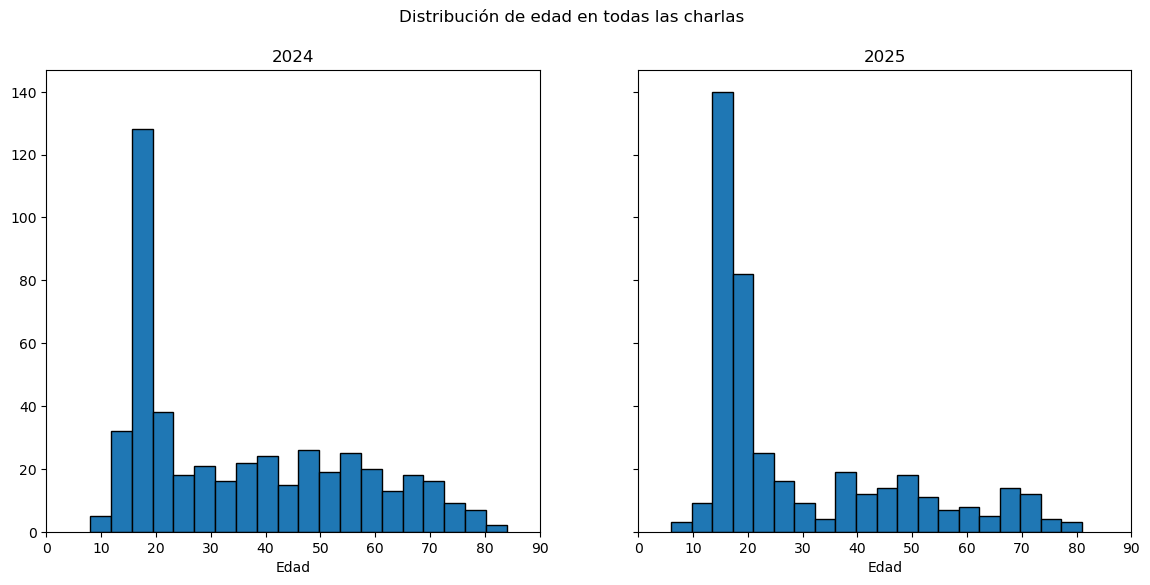

count    474.000000
mean      35.565600
std       19.536969
min        8.000000
25%       17.000000
50%       30.000000
75%       51.000000
max       84.000000
Name: Edad, dtype: float64
count    415.000000
mean      29.383133
std       18.120509
min        6.000000
25%       17.000000
50%       19.000000
75%       41.000000
max       81.000000
Name: Edad, dtype: float64


In [107]:
#Para definir los bines primero checo la distribución de edad

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- 2024 ---
axes[0].hist(df_gen_edad_24['Edad'], bins=20, edgecolor='black')
axes[0].set_title('2024')
axes[0].set_xlabel('Edad')

# --- 2025 ---
axes[1].hist(df_gen_edad_25['Edad'], bins=20, edgecolor='black')
axes[1].set_title('2025')
axes[1].set_xlabel('Edad')

for ax in axes:
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)
    ax.set_xticklabels([abs(int(x)) for x in xticks])

plt.suptitle('Distribución de edad en todas las charlas')
plt.show()

print(df_gen_edad_24['Edad'].describe())
print(df_gen_edad_25['Edad'].describe())

Como tengo una alta concentración de respuestas en 18-20, voy a "ampliar" los bines en esa zona.

In [108]:
#Defino bines

bins = [0, 15, 18, 21, 25, 35, 45, 55, 65, 75, 85, 100]
labels = [
    '0-14', '15-17', '18-20', '21-24', '25-34',
    '35-44', '45-54', '55-64', '65-74', '75-84', '85+'
]

#Agrego una columna llamada "grupo_edad" para saber en qué bin está cada respuesta

df_gen_edad_24.loc[:,'grupo_edad'] = pd.cut(
    df_gen_edad_24['Edad'],
    bins=bins,
    labels=labels,
    right=False
)

df_gen_edad_25.loc[:,'grupo_edad'] = pd.cut(
    df_gen_edad_25['Edad'],
    bins=bins,
    labels=labels,
    right=False
)

In [109]:
df_gen_edad_25

,Edad,Genero,grupo_edad
0,15.0,Masculino,15-17
1,19.0,Masculino,18-20
2,60.0,Masculino,55-64
3,19.0,Femenino,18-20
4,17.0,Masculino,15-17
...,...,...,...
413,24.0,Masculino,21-24
414,18.0,Femenino,18-20
415,66.0,Femenino,65-74
416,22.0,Masculino,21-24


In [125]:
#Para checar si hay edades fuera del rango
#print(df_gen_edad_24['grupo_edad'].isna().sum())
print(df_gen_edad_25['grupo_edad'].isna().sum())

# Mostrar filas donde 'grupo_edad' es NaN (fuera de los bins definidos o edad faltante)
#print(df_gen_edad_25[df_gen_edad_25['grupo_edad'].isna()])

0


In [113]:
# Agrupar y crear tabla de frecuencias
piramide_24 = df_gen_edad_24.groupby(['grupo_edad', 'Genero'], observed=True).size().unstack(fill_value=0)
piramide_25 = df_gen_edad_25.groupby(['grupo_edad', 'Genero'], observed=True).size().unstack(fill_value=0)

# (Opcional) Asegurar orden de columnas por si hay más géneros
#piramide_24 = piramide_24[['Femenino', 'Masculino']] if 'Femenino' in piramide_24.columns and 'Masculino' in piramide_24.columns else piramide_24

# Invertir valores de Masculino para que aparezcan a la izquierda
if 'Masculino' in piramide_24.columns:
    piramide_24['Masculino'] = -piramide_24['Masculino']

if 'Masculino' in piramide_25.columns:
    piramide_25['Masculino'] = -piramide_25['Masculino']

In [114]:
# Convertir edades a numérico
for df in [df_gen_edad_24, df_gen_edad_25]:
    df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
    df.dropna(subset=['Edad', 'Genero'], inplace=True)
    df['Genero'] = df['Genero'].str.strip().str.capitalize()
    df['grupo_edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

### Gráfica de pirámide de población

In [115]:
# Agrupar 2024
p24 = df_gen_edad_24.groupby(['grupo_edad', 'Genero'], observed=True).size().unstack(fill_value=0)
if 'Masculino' in p24.columns:
    p24['Masculino'] = -p24['Masculino']

# Agrupar 2025
p25 = df_gen_edad_25.groupby(['grupo_edad', 'Genero'], observed=True).size().unstack(fill_value=0)
if 'Masculino' in p25.columns:
    p25['Masculino'] = -p25['Masculino']

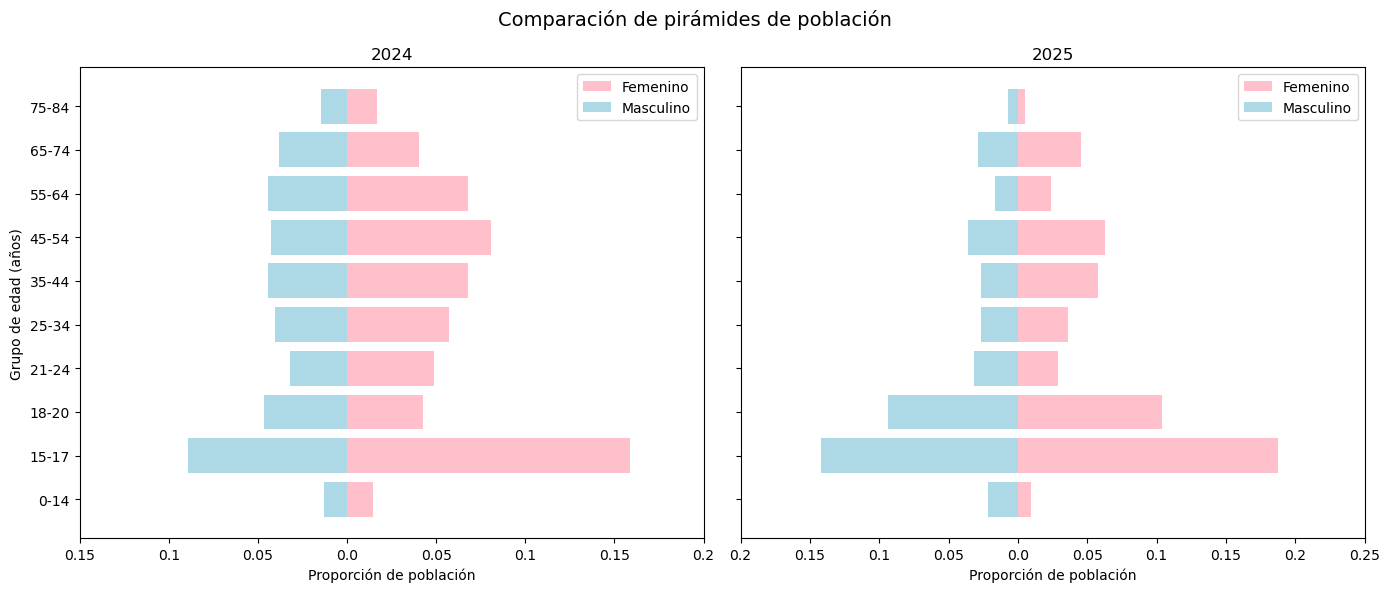

In [123]:
# Normalizar para mostrar proporciones
total_24 = p24.abs().sum().sum()
total_25 = p25.abs().sum().sum()
p24_prop = p24 / total_24
p25_prop = p25 / total_25

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Pirámide 2024 (proporciones) ---
axes[0].barh(p24_prop.index, p24_prop.get('Femenino', 0), color='pink', label='Femenino')
axes[0].barh(p24_prop.index, p24_prop.get('Masculino', 0), color='lightblue', label='Masculino')
axes[0].set_title('2024')
axes[0].set_xlabel('Proporción de población')

# --- Pirámide 2025 (proporciones) ---
axes[1].barh(p25_prop.index, p25_prop.get('Femenino', 0), color='pink', label='Femenino')
axes[1].barh(p25_prop.index, p25_prop.get('Masculino', 0), color='lightblue', label='Masculino')
axes[1].set_title('2025')
axes[1].set_xlabel('Proporción de población')

axes[0].set_ylabel('Grupo de edad (años)')
for ax in axes:
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)
    ax.set_xticklabels([abs(round(x, 2)) for x in xticks])
    ax.legend()

plt.suptitle('Comparación de pirámides de población', fontsize=14)
plt.tight_layout()
plt.show()